In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv('./goog.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,12/19/2016,790.219971,797.659973,786.270020,794.200012,1225900
1,12/20/2016,796.760010,798.650024,793.270020,796.419983,925100
2,12/21/2016,795.840027,796.676025,787.099976,794.559998,1208700
3,12/22/2016,792.359985,793.320007,788.580017,791.260010,969100
4,12/23/2016,790.900024,792.739990,787.280029,789.909973,623400


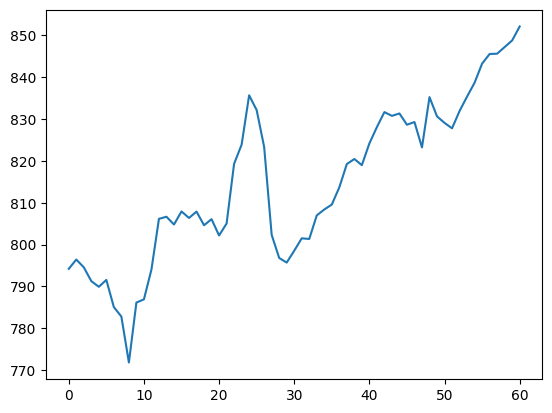

In [4]:
plt.plot(df['Close'])


In [5]:
sc = MinMaxScaler()
data=sc.fit_transform(np.array(df['Close']).reshape(-1,1))

In [6]:
training_size = int(len(data)-13)
train_data, test_data = data[:training_size,:], data[training_size:,:]

In [7]:
len(train_data), len(test_data)

(48, 13)

In [10]:
def createdataset(data, step=4):
    x = []
    y = []

    for i in range(len(data) -step):
        x.append(data[i:i+step, 0])
        y.append(data[i+step, 0])

    return np.array(x), np.array(y)

x_train, y_train = createdataset(train_data)
x_test, y_test = createdataset(test_data)

In [11]:
model = Sequential([
    SimpleRNN(units=50, activation='tanh', input_shape=(x_train.shape[1],1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

c:\Users\Ziyaad Parkar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.fit(x_train, y_train, epochs=100,verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.4178
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2012
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0846
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0294
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0263
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0475
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0614
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0597
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0416
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0279
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0203
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0199
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0216
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0257
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0255
Epoch 16/100
2/2 ━━

In [13]:
metrics = model.evaluate(x_test, y_test)
metrics

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - loss: 0.0166


0.016604004427790642

In [14]:
y_pred = sc.inverse_transform(model.predict(x_test))
y_test = sc.inverse_transform(np.array(y_test).reshape(-1,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


In [16]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

print('MSE: ', mse)
print('MAE: ', mae)
print('RMSE: ', rmse)

MSE:  107.06417937009155
MAE:  10.217156226128472
RMSE:  10.34718219468912


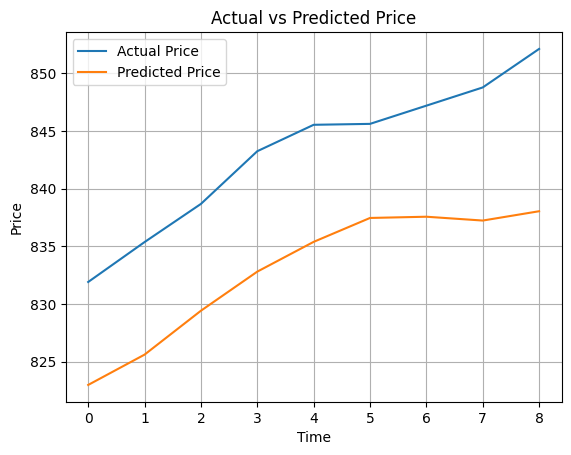

In [17]:
plt.plot(y_test, label='Actual Price')

plt.plot(y_pred, label='Predicted Price')

plt.title('Actual vs Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()